In [1]:
import pandas as pd
data = pd.read_excel('whitewine.xlsx')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
#匯入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LogisticRegression
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import random

In [3]:
#設定xy
x=data.iloc[:,:11]
y=data["quality"]
# x
# y

In [4]:
# pd.unique(data['quality'])
data['quality'].astype("category").cat.codes
y=data["quality"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=40)

In [6]:
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('X_test:', x_test.shape)
print('y_test:', y_test.shape)

X_train: (3918, 11)
y_train: (3918,)
X_test: (980, 11)
y_test: (980,)


In [8]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier/fitting the model
clf.fit(x_train, y_train)

# predict the response
y_preds = clf.predict(x_test)
acc_rf = round(clf.score(x_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_preds)*100,"%")

Random Forest Classifier Accuracy: 68.36734693877551 %


In [12]:
print(classification_report(y_test,y_preds,target_names=["3","4","5","6","7","8","9"]))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.60      0.21      0.31        29
           5       0.71      0.68      0.70       298
           6       0.65      0.80      0.71       435
           7       0.74      0.53      0.61       175
           8       0.88      0.56      0.69        39
           9       0.00      0.00      0.00         1

    accuracy                           0.68       980
   macro avg       0.51      0.40      0.43       980
weighted avg       0.69      0.68      0.68       980



C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ericc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print(clf.score(x_train,y_train))
print(accuracy_score(y_test,y_preds))

1.0
0.6836734693877551


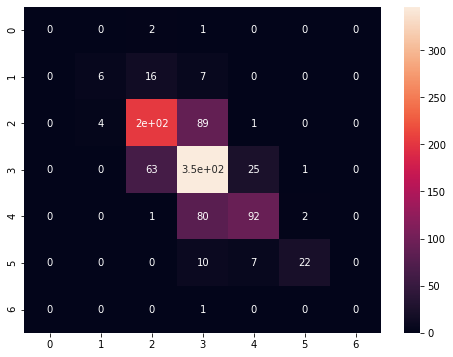

In [14]:
cm=confusion_matrix(y_test,y_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [15]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the Classifier/fitting the model
gnb.fit(x_train, y_train)

# predict the response
y_pred = gnb.predict(x_test)
acc_gnb = round(gnb.score(x_test,y_test) * 100, 2)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Naive Bayes Accuracy: 44.08163265306123 %
